# EDA of The Video Game Industry

## " "

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include:

- Rank - Ranking of overall sales
- Name - The games name
- Platform - Platform of the games release (i.e. PC,PS4, etc.)
- Year - Year of the game's release
- Genre - Genre of the game
- Publisher - Publisher of the game
- NA_Sales - Sales in North America (in millions)
- EU_Sales - Sales in Europe (in millions)
- JP_Sales - Sales in Japan (in millions)
- Other_Sales - Sales in the rest of the world (in millions)
- Global_Sales - Total worldwide sales.

The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape. It is based on BeautifulSoup using Python. 

There are 16,598 records. 2 records were dropped due to incomplete information.

## Setting up the environment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configuring the Seaborn module
sns.set_style("white")

## Loading the dataset

In [2]:
# Loading the csv file containing the data and transforming it into a pandas DataFrame
df = pd.read_csv(r'D:\Data\vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Exploratory Data Analysis

Exploratory data analysis (EDA) is a specified approach and method to analyze and investigate data sets, in order to summarize their main characteristics, mainly through employing data visualization methods. 

#### Information about the containing data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### Basic Summary Statistics

In [4]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


#### Analyzing The Total Sales by Regions

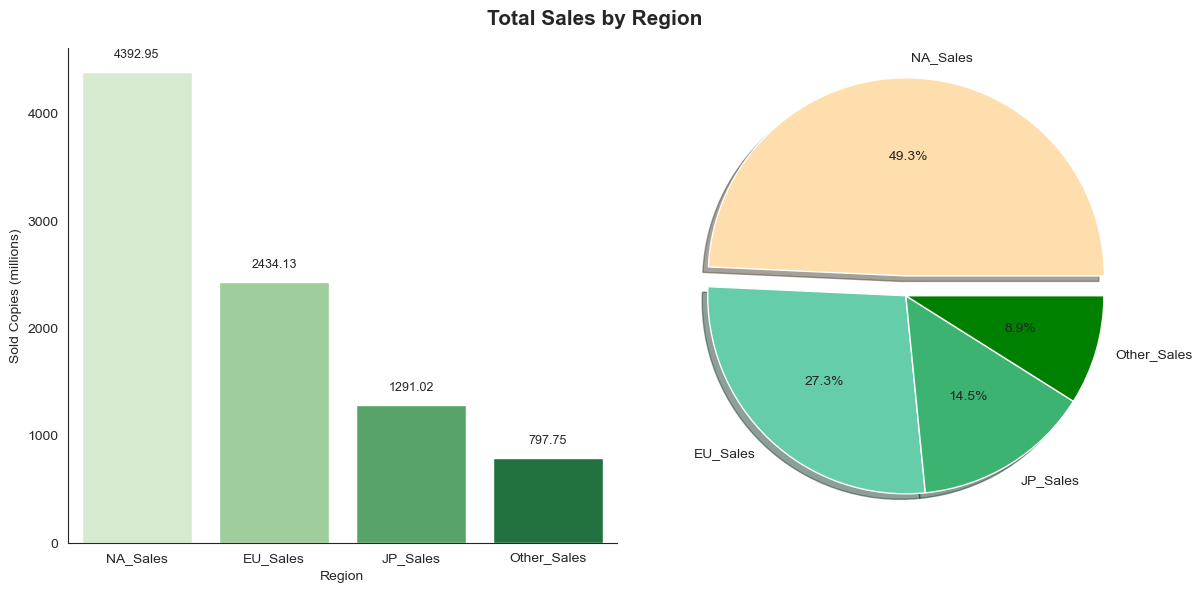

In [5]:
# Grouping the total sales by region
sales_regions_df = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().reset_index()
sales_regions_df = sales_regions_df.rename(columns={"index": "Region", 0: "Total Sales"})

# Creating the graph
plt.figure(figsize=(12, 6))
plt.suptitle("Total Sales by Region", weight='bold', fontsize=15)

# Plotting the summed values of sales on a Bar Plot
plt.subplot(121)
sales_regions = sns.barplot(data=sales_regions_df, x='Region', y='Total Sales', palette='Greens')
#Naming the X and Y axis
sales_regions.set(ylabel='Sold Copies (millions)', xlabel='Region')
#Adding the data values to the columns
for bar in sales_regions.containers:
    sales_regions.bar_label(bar, padding=8, fontsize=9)
# Removing borders
sns.despine()
plt.tight_layout()

# Plotting the percentage of sales on a Pie Chart
plt.subplot(122)
sales_regions_pie = plt.pie(data=sales_regions_df, 
                            x='Total Sales', 
                            labels= 'Region',
                            colors=['navajowhite','mediumaquamarine','mediumseagreen','green'],
                            explode = [0.1, 0, 0, 0],
                            shadow = True,
                            autopct='%1.1f%%')

The region of North America is clearly leading with the highest number of sold video games - 4 billion and 392 million copies. Following next is the European Union, with almost half of the sales in North America - 2 billion and 434 million copies. Followed by Japan with 1 billion and 291 million and the lastly, the combined all other, unspecified regions with 797 millions of sold copies. 

#### Analyzing the Sales of Genres 

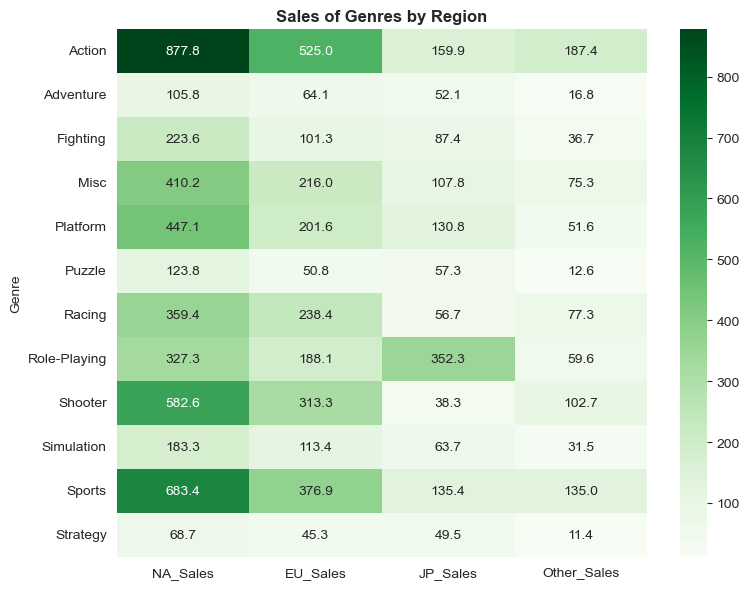

In [6]:
# Grouping the region sales by genre
genres_region_df = df.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()

plt.figure(figsize=(8, 6))

# Plotting the values on a heatmap
genres_region = sns.heatmap(data=genres_region_df, annot=True, fmt='.1f', cmap="Greens")

# Adding a title
genres_region.set_title("Sales of Genres by Region", weight='bold')

plt.tight_layout()
plt.show()

Looking the displayed heatmap above, we can see that the most popular genre of video games in the region of North America, are the Action games, followed by the Sports and Shooter genres. The Action genre is also the most popular genre in the region of the European Union, again followed by the Sports and Shooter games, showing that the two regions are similliar in their taste for video games genres.

#### Analyzing the Platforms Popularity

In [7]:
# Creating a function that will be used for grouping the platforms' sold games by regions
def calculate_platform_region(region, plt_column):
    # Grouping the sales for the top 5 platforms
    region_platforms = ((df.groupby('Platform')[f'{region}'].sum()).reset_index()).nlargest(5, [f'{region}'])
    # Plotting the grouped data on a bar plot
    ax = sns.barplot(x=region_platforms[f'{region}'],y=region_platforms['Platform'], color='mediumseagreen')
    #Adding the data values to the columns
    for bar in ax.containers:
        ax.bar_label(bar, padding=3, fontsize=8)
    # Adding a title
    ax.set_title(f"{region}", fontsize=12, weight='bold')
    # Adding axis labels
    if plt_column == 1:
        ax.set_xlabel("Games Sold (millions)")
        ax.set_ylabel("Platform")
    else: 
        ax.set_xlabel(None)
        ax.set_ylabel(None)
    # Removing borders
    sns.despine()
    plt.tight_layout()

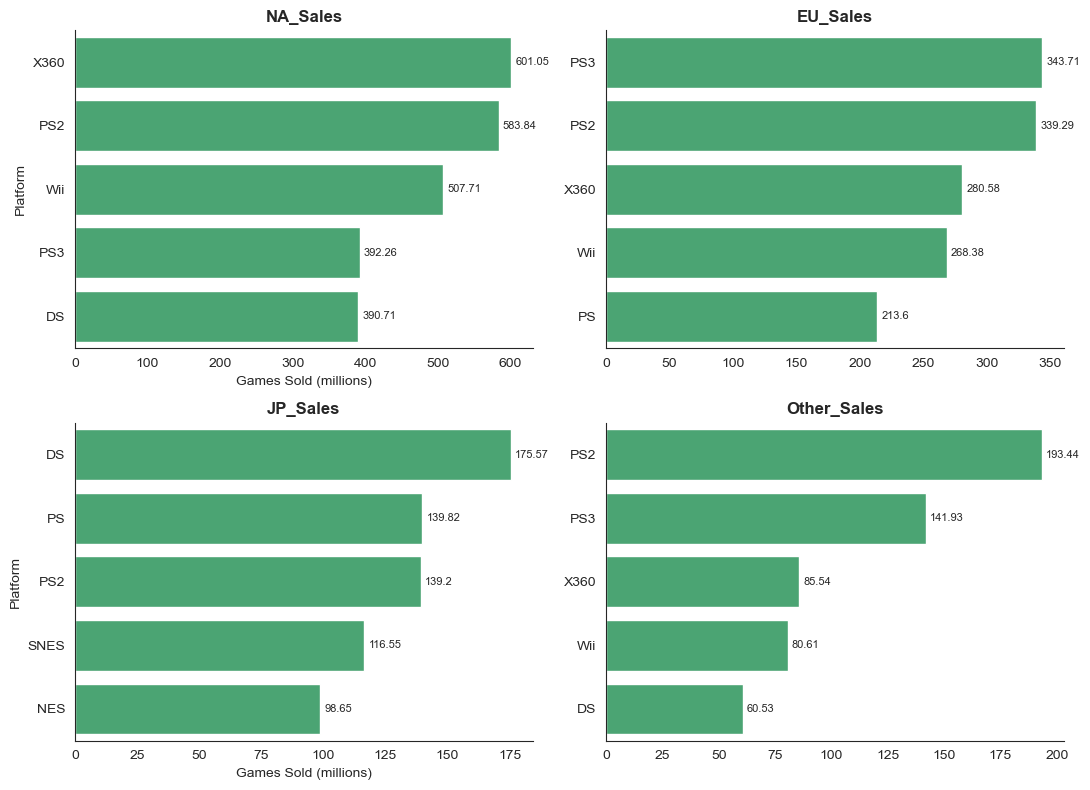

In [8]:
# Creating the plot
plt.figure(figsize=(11, 8))

# Grouping the platforms for North America
plt.subplot(221)
calculate_platform_region("NA_Sales",1)

# Grouping the platforms for the European Union
plt.subplot(222)
calculate_platform_region("EU_Sales",2)

# Grouping the platforms for Japan
plt.subplot(223)
calculate_platform_region("JP_Sales",1)

# Grouping the platforms for North America
plt.subplot(224)
calculate_platform_region("Other_Sales",2)

plt.tight_layout()

Looking at the graphs above, we can see that the regions do not have the same favourite platform to play video games on. Altough the lists of top 5 platforms for every region do not difffer that greatly from one another, containg more or less the same contenders. These being the PS2, X360, PS3, Wii and DS.

#### Analyzing the Sales Trend

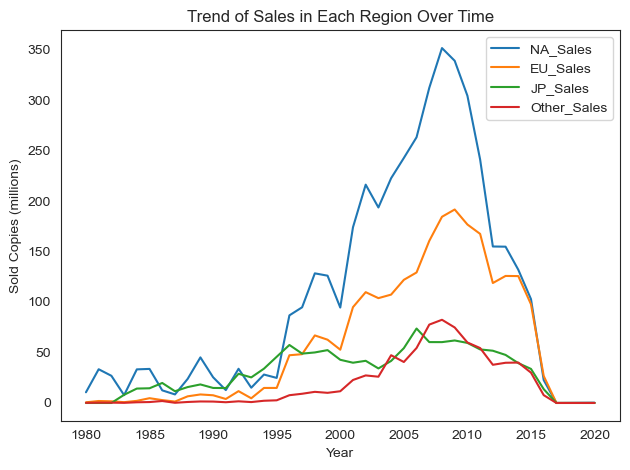

In [9]:
# Sum each years sales per region
years_regions = df.groupby(['Year']).sum(['NA_Sales'])
years_regions = years_regions.drop(columns=['Rank','Global_Sales'])

# Create the graph
years_regions.plot(kind='line', title='Trend of Sales in Each Region Over Time',
                     ylabel = 'Sold Copies (millions)')

plt.tight_layout()

> The line chart show that the peak years in terms of sold video games copies, for all regions are almost the same, all being around the years of 2005-2010.

#### Analyzing the Distributions of Genres Frequency Amongst Video Games

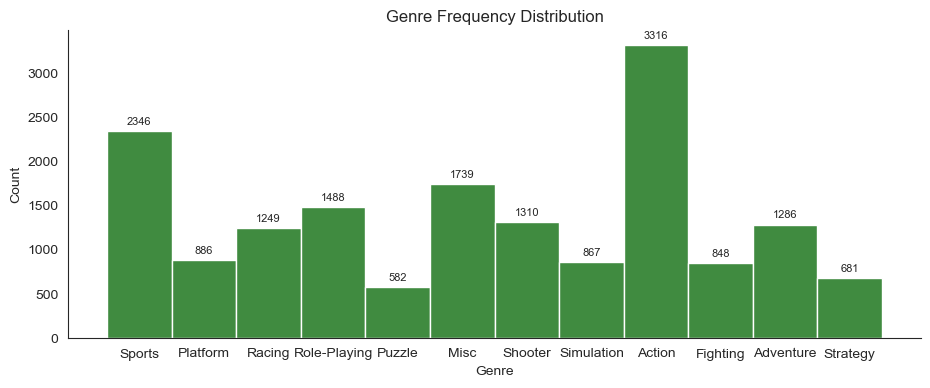

In [22]:
plt.figure(figsize=(11, 4))

# Plotting the frequency of each genre
genres_dist = sns.histplot(data=df, x='Genre',color='darkgreen')

#Adding the data values to the columns
for bar in genres_dist.containers:
    genres_dist.bar_label(bar, padding=3, fontsize=8)
    
# Adding a title 
genres_dist.set_title("Genre Frequency Distribution")

# Removing borders
sns.despine()

#### Plot pairwise relationships in the dataset

<Figure size 600x400 with 0 Axes>

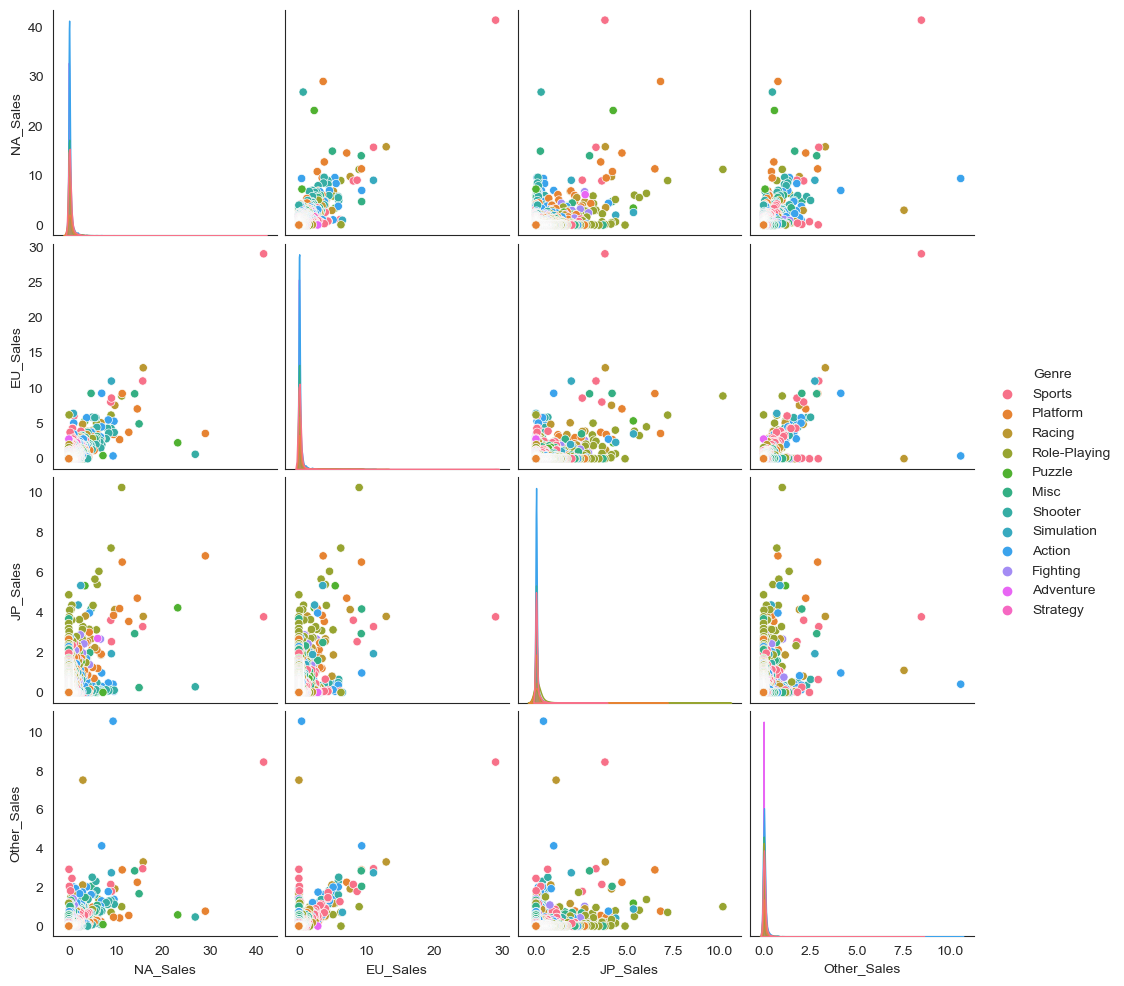

In [12]:
plt.figure(figsize=(6, 4))

# Extracting the data to be paired
pair_df = df.loc[:,["Genre", "NA_Sales","EU_Sales","JP_Sales", "Other_Sales"]]

# Visualizing the pairs
pair = sns.pairplot(pair_df, hue='Genre')
plt.show()

#### Analyzing the Publishers

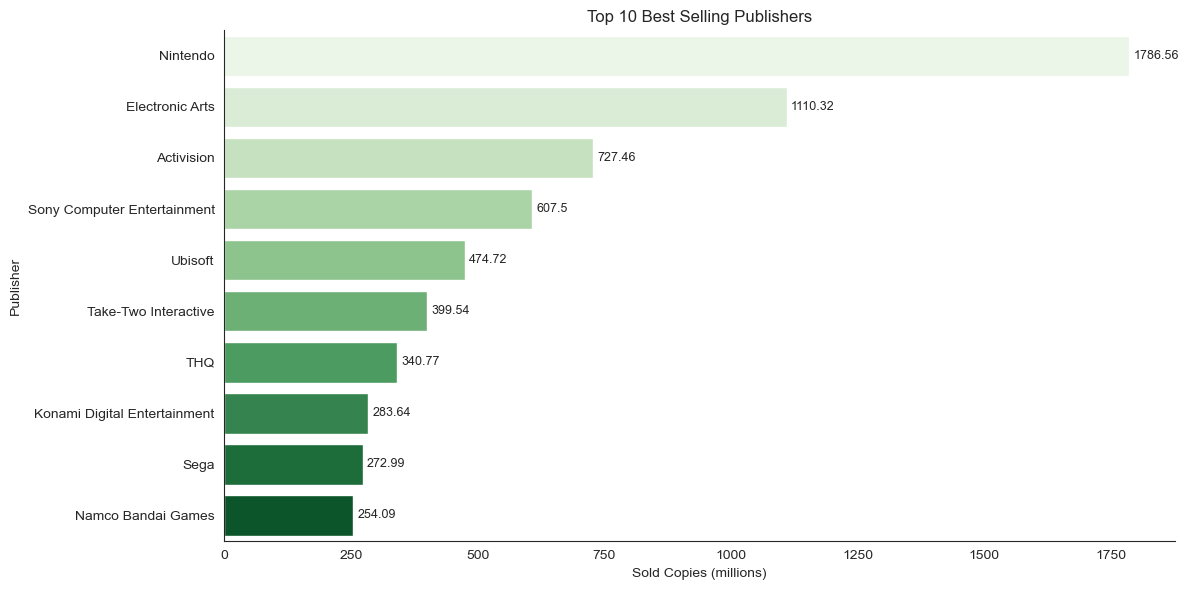

In [20]:
# Grouping the total sales by publisher
publishers_df = (((df.groupby('Publisher')['Global_Sales'].sum()).reset_index())).sort_values(by=['Global_Sales'], 
                                                                                              ascending=False)
publishers_df = publishers_df.nlargest(10, 'Global_Sales')

# Creating the graph
plt.figure(figsize=(12, 6))
publishers = sns.barplot(x=publishers_df['Global_Sales'], y=publishers_df['Publisher'], palette='Greens')
#Adding the data values to the columns
for bar in publishers.containers:
    publishers.bar_label(bar, padding=3, fontsize=9)
# Adding the title and X axis lalel
publishers.set_xlabel("Sold Copies (millions)")
publishers.set_title("Top 10 Best Selling Publishers")
# Removing borders
sns.despine()
plt.tight_layout()